# Dataset Info

https://www.kaggle.com/c/house-prices-advanced-regression-techniques/overview

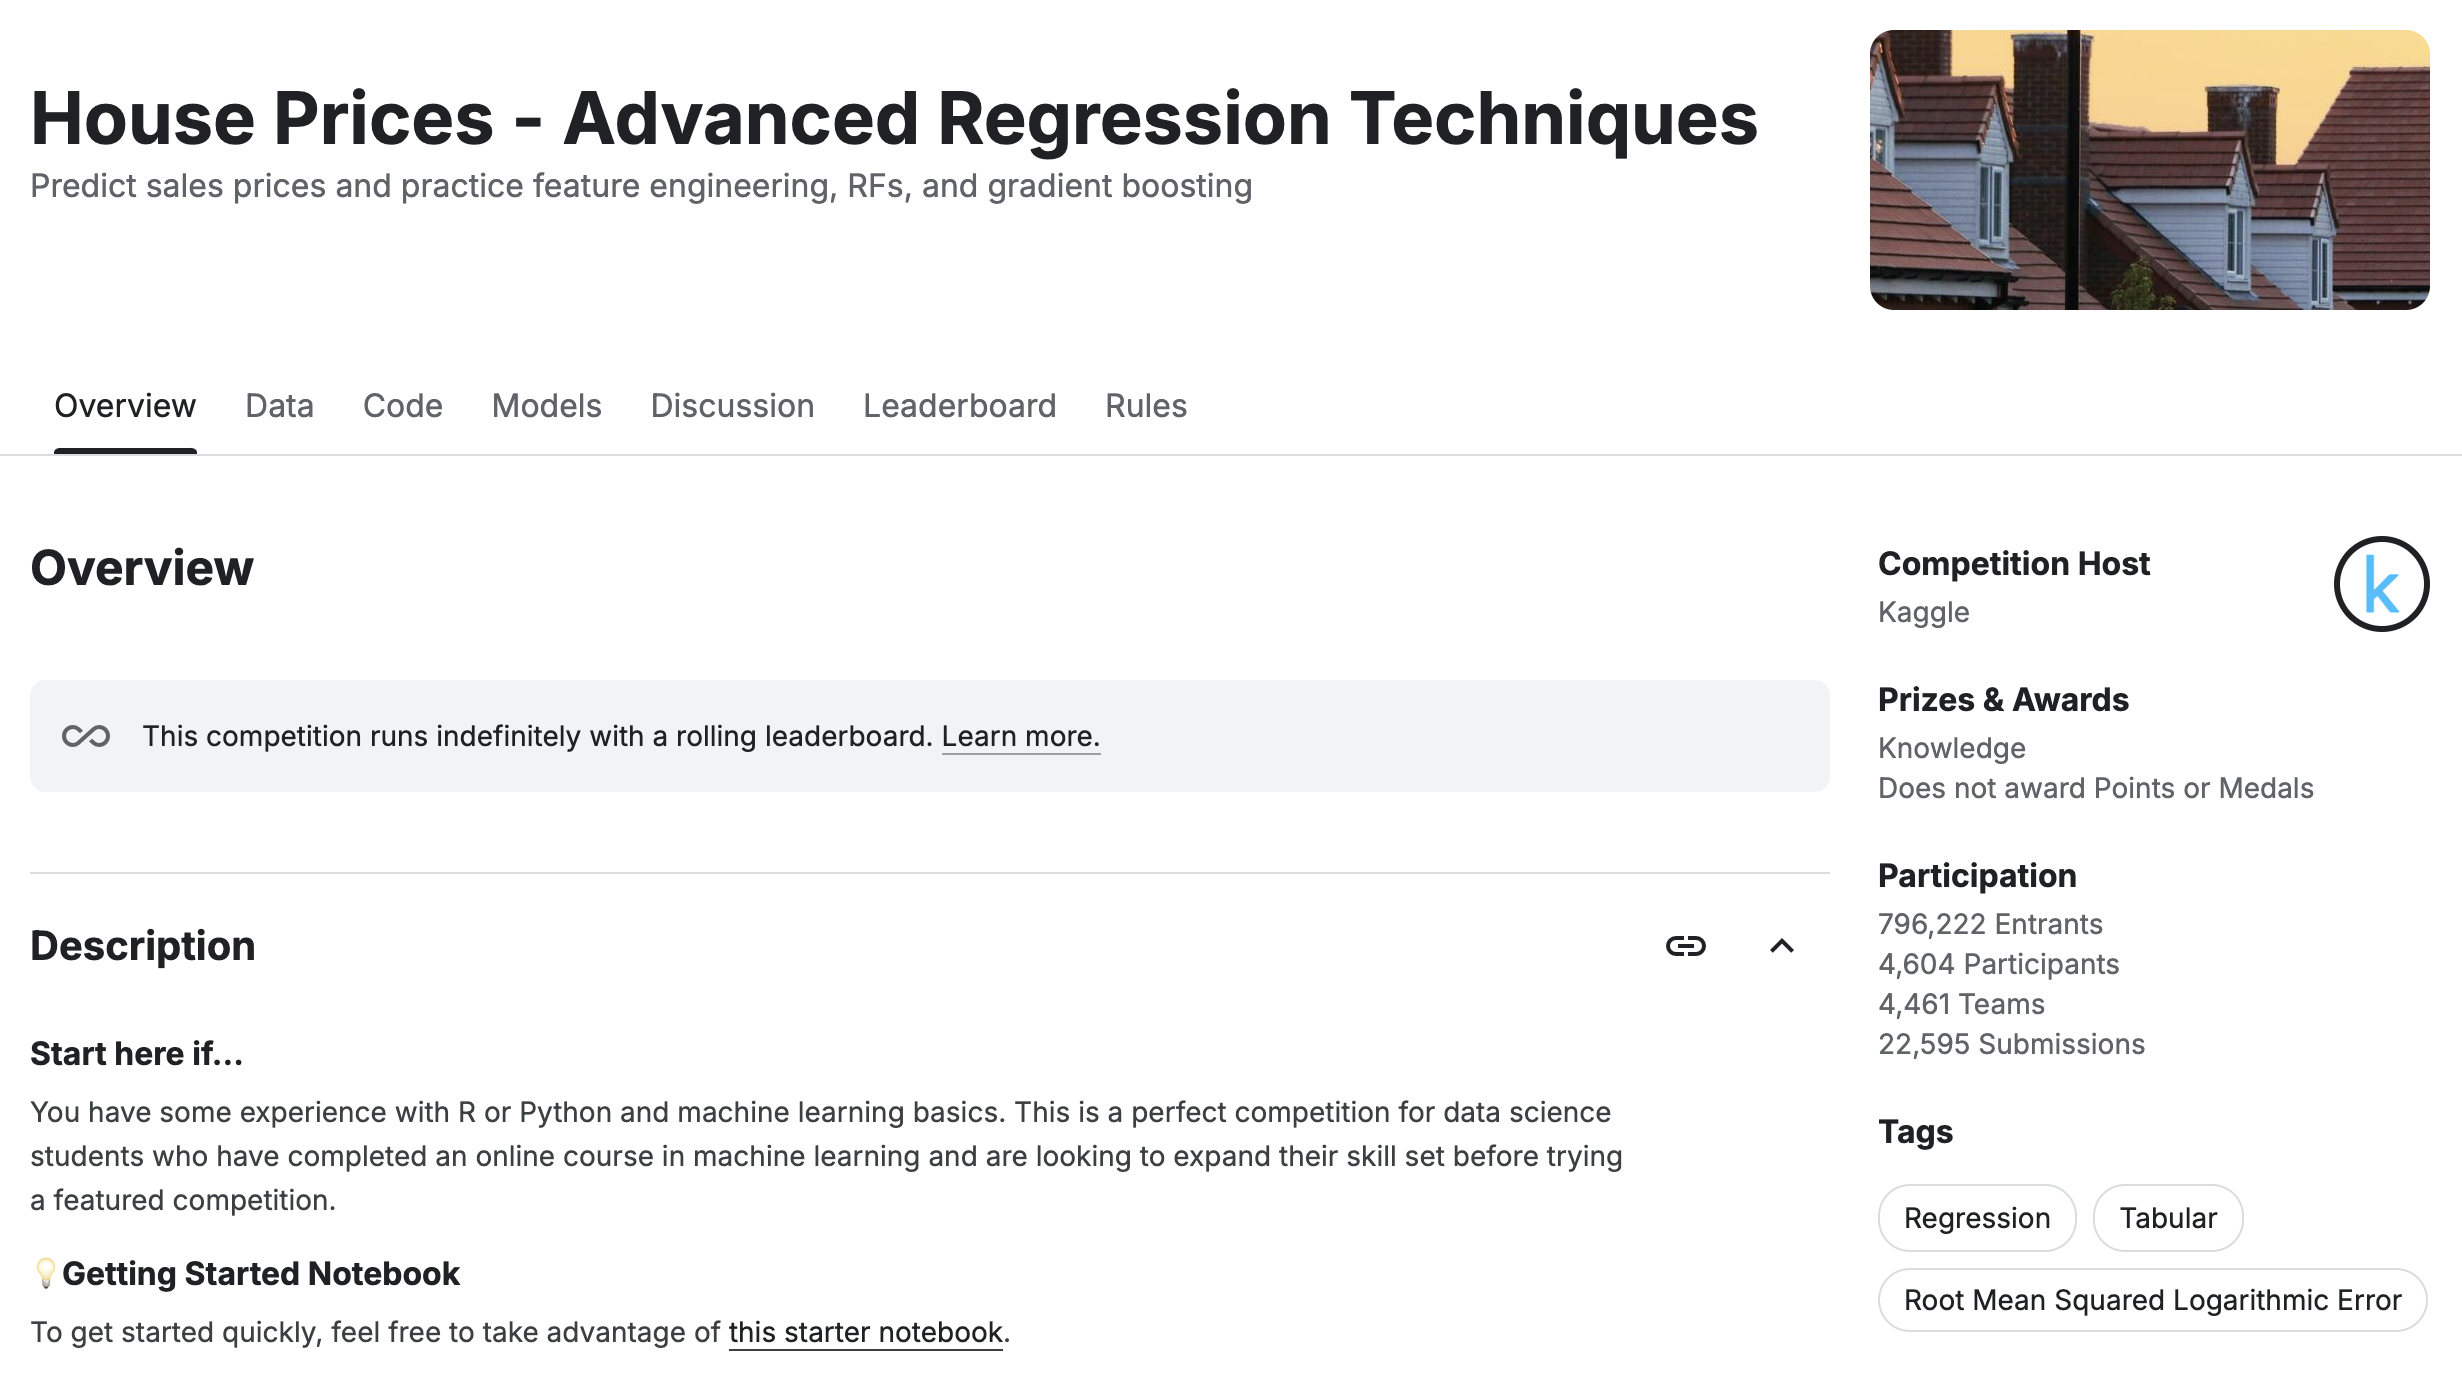

# Get started

## Must-know information

This lab for demo purpose of Linear Regression only, there are many ways you can try to get higher score

For FSDS lab only 
- Only <b>GrLivArea</b> feature is used
- <b><i>lab_train.csv & lab_test.csv</i></b> in demo only


For real Kaggle challenge
- please re-train model with <b>kaggle_train.csv & kaggle_test.csv</b>
- You should use all features 
- You can use other different technique and models to get better model

## Recap ML workflow

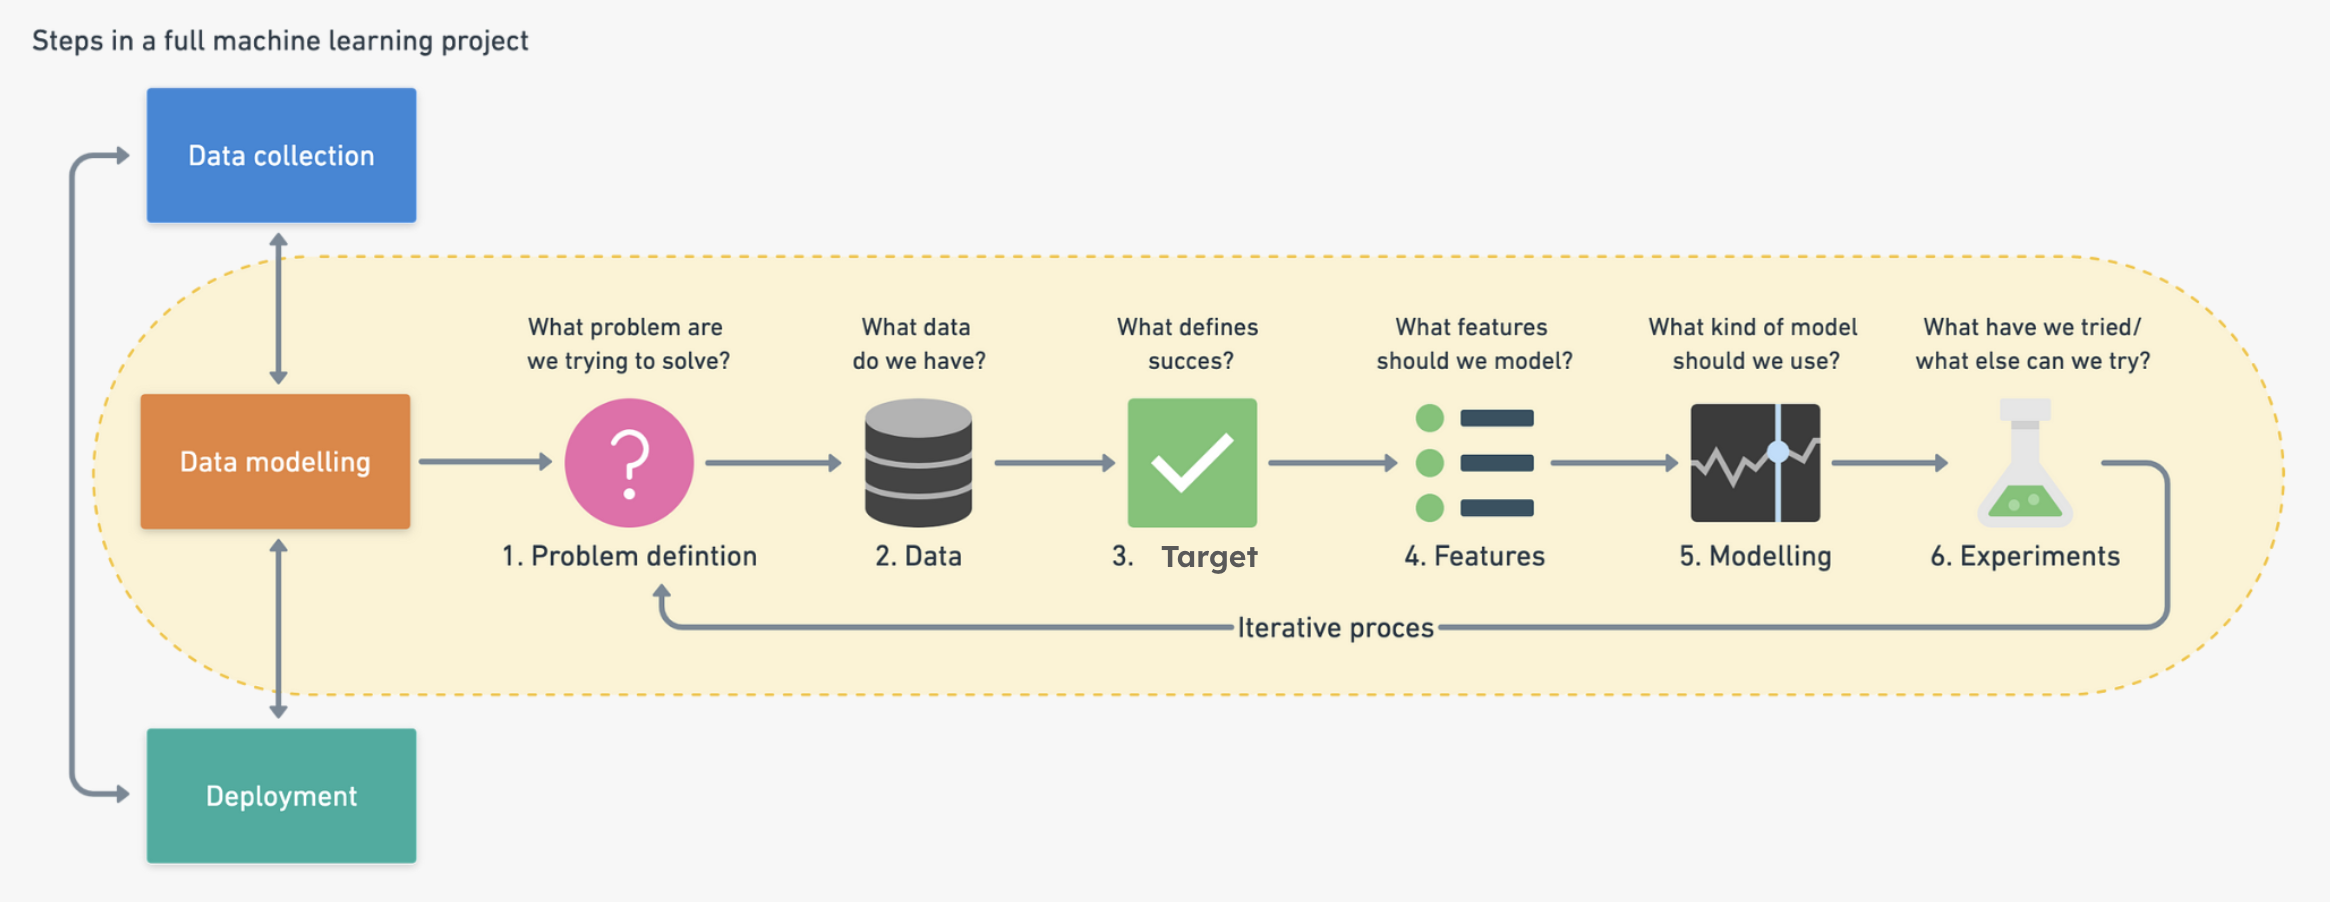

## Import libraries

In [1]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load Train Data

In [2]:
# Load the dataset
data = pd.read_csv('lab_train.csv')

In [3]:
# for demo only, I use only feature GrLivArea (or GrLivArea: Above grade (ground) living area square feet), our target is SalePrice
data = data[['GrLivArea', 'SalePrice']]

In [4]:
data

,GrLivArea,SalePrice
0,1050,128900
1,1340,120000
2,1360,125500
3,1976,440000
4,950,119500
...,...,...
1163,985,149900
1164,1032,148000
1165,1894,214900
1166,1920,137000


## Get information of dataframe

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1168 entries, 0 to 1167
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   GrLivArea  1168 non-null   int64
 1   SalePrice  1168 non-null   int64
dtypes: int64(2)
memory usage: 18.4 KB


In [6]:
data.describe()

,GrLivArea,SalePrice
count,1168.000000,1168.000000
mean,1505.699486,180118.351884
std,521.926794,79384.594382
min,334.000000,34900.000000
25%,1125.750000,129000.000000
50%,1456.000000,163250.000000
75%,1764.500000,212225.000000
max,5642.000000,755000.000000


## Visualize feature and target

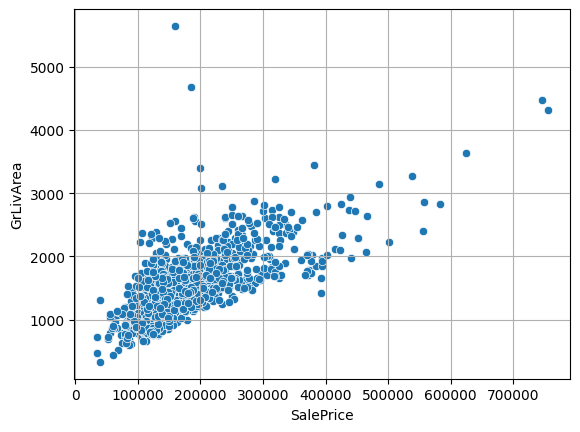

In [7]:
sns.scatterplot(data, x='SalePrice', y='GrLivArea')
plt.grid()

# Load Test Data

In [8]:
test = pd.read_csv('lab_test.csv')

In [9]:
# for demo only
test = test[['GrLivArea', 'SalePrice']]

In [10]:
test

,GrLivArea,SalePrice
0,1559,153500
1,816,110000
2,1836,216837
3,1086,159950
4,1719,324000
...,...,...
287,2230,118500
288,1456,172785
289,894,130000
290,1573,227000


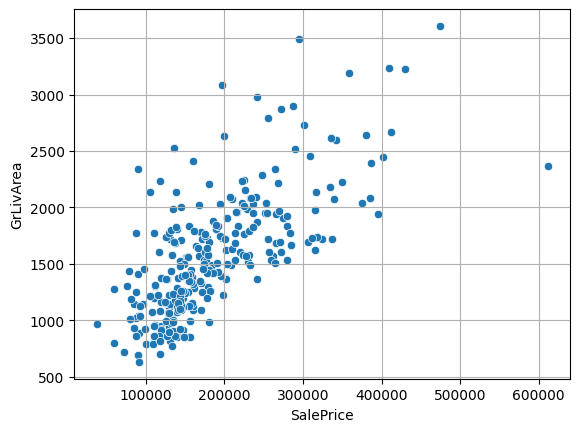

In [11]:
sns.scatterplot(test, x='SalePrice', y='GrLivArea')
plt.grid()

## Compare 2 dataset

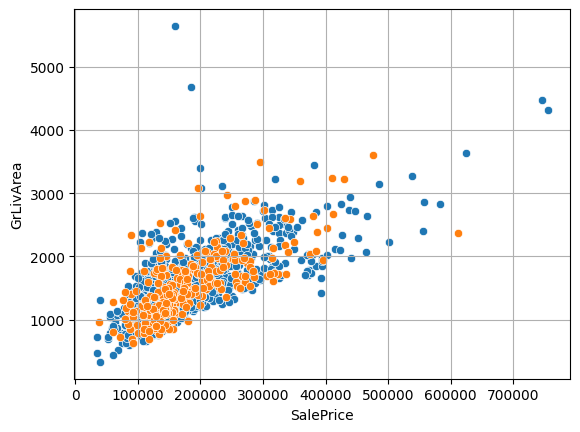

In [12]:
sns.scatterplot(data, x='SalePrice', y='GrLivArea')
sns.scatterplot(test, x='SalePrice', y='GrLivArea')
plt.grid()

- Any comments?

# Split Train/Test Dataset

In [13]:
# for convention
train = data

In [14]:
# Splitting the data into training and testing sets
X = train.drop('SalePrice', axis=1)  # Features (all columns except the target)
y = train['SalePrice']  # Target variable

In [15]:
# Split the dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train[['GrLivArea']], test[['GrLivArea']], train['SalePrice'], test['SalePrice']

In [16]:
X_train

,GrLivArea
0,1050
1,1340
2,1360
3,1976
4,950
...,...
1163,985
1164,1032
1165,1894
1166,1920


In [17]:
y_train

0       128900
1       120000
2       125500
3       440000
4       119500
         ...  
1163    149900
1164    148000
1165    214900
1166    137000
1167    179900
Name: SalePrice, Length: 1168, dtype: int64

In [18]:
X_train.shape

(1168, 1)

In [19]:
X_test.shape

(292, 1)

# Modeling: Linear Regression

In [20]:
# Building and training the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)  # Train the model on the training data

LinearRegression()

In [21]:
# Making predictions on the test set
y_pred = model.predict(X_test)

In [22]:
# inspect y_pred
y_pred[:5]

array([185854.41165117, 105894.72436881, 215664.41619654, 134951.40749968,
       203073.18683983])

# Evaluation

In [23]:
# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

In [24]:
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')

Root Mean Squared Error (RMSE): 55879.50


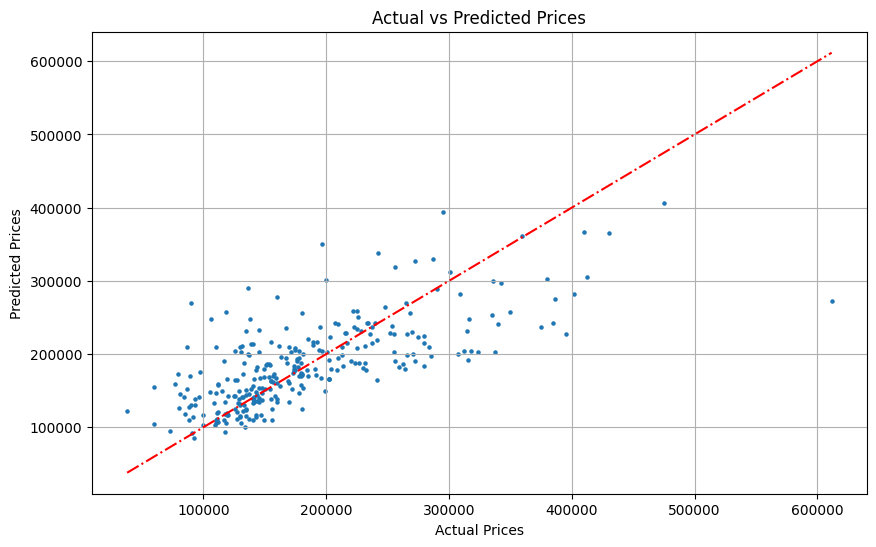

In [25]:
# Visualizing the predictions vs. actual values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, s=5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='-.')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.grid()
plt.show()

# Kaggle Submission

For who wants to join the real DS challenge:

- Please retrain with kaggle_train.csv and make prediction with kaggle_test.csv in the right format for Kaggle challenge

In [26]:
# Sample submission format, You must follow this format to get assessed in Kaggle
sample_format = pd.read_csv('kaggle_sample_submission.csv')
sample_format

,Id,SalePrice
0,1461,169277.052498
1,1462,187758.393989
2,1463,183583.683570
3,1464,179317.477511
4,1465,150730.079977
...,...,...
1454,2915,167081.220949
1455,2916,164788.778231
1456,2917,219222.423400
1457,2918,184924.279659


In [27]:
# this code below for Kaggle submission, It’s not completely good to get Kaggle leaderboard
kaggle_test = pd.read_csv('kaggle_test.csv')
kaggle_test

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


In [28]:
kaggle_test = kaggle_test.set_index('Id')

In [29]:
pred_prices = model.predict(kaggle_test[['GrLivArea']])

In [30]:
final_df = pd.DataFrame({
    'Id': kaggle_test.index.tolist(),
    'SalePrice': pred_prices
})
final_df

,Id,SalePrice
0,1461,114504.111963
1,1462,161102.422317
2,1463,193387.625796
3,1464,190697.192173
4,1465,155829.172416
...,...,...
1454,2915,135597.111569
1455,2916,135597.111569
1456,2917,149802.601100
1457,2918,122467.795488


In [31]:
final_df.to_csv('submission.csv', index=False)

## How to submit file

You submit your submission.csv file into the challenge

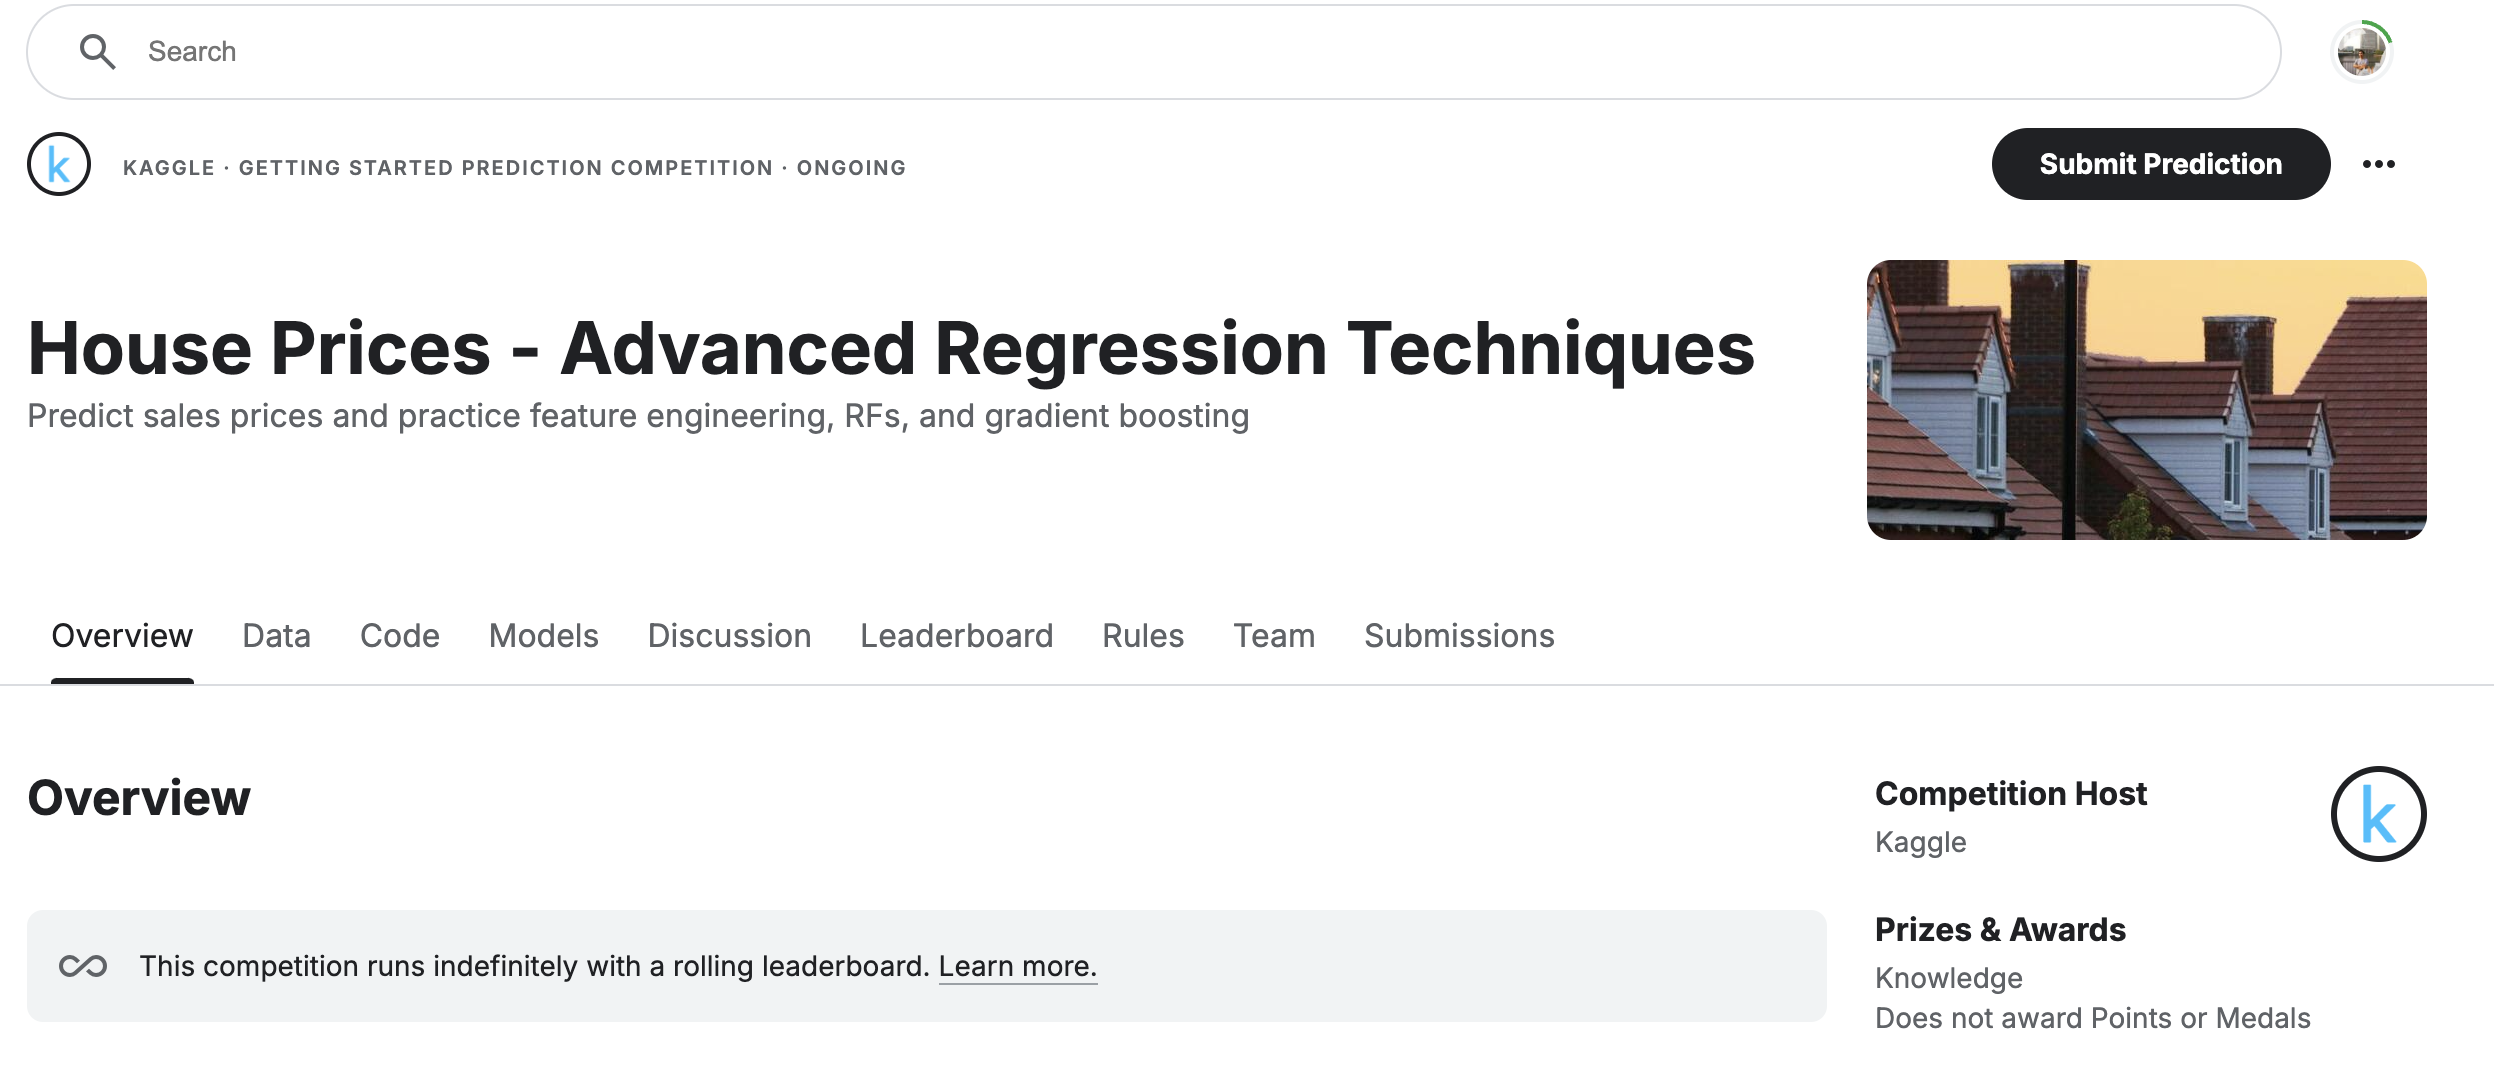

Back to LeaderBoard tab and see your position

In [32]:
# End of Lab 1